## Logistic Using Nueral Network
In this example we would do logistic regression using sigle layer and single neuron. As you can imagine the activation function would be sigmoid and we would get the output between 0 and 1. Lets start by importing the packages we need.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import sigmoid
from tensorflow.keras import Sequential
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Lets get the training data in 2 different matrix. We have features n X_train and labels in Y_train. Please note that both are matrix. As we only have single feature hence the matrix shape would be m x 1 and m x 1. Lets print and validate that.

In [2]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

print(X_train.shape)
print(Y_train.shape)

(6, 1)
(6, 1)


In [5]:
pos = Y_train == 1
neg = Y_train == 0

print(pos)
print(neg)

print(X_train[pos])

[[False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]]
[[ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
[3. 4. 5.]


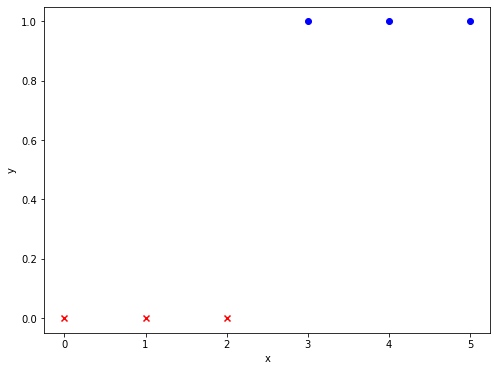

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(X_train[pos], Y_train[pos], color="b", marker="o", label="Positive")
ax.scatter(X_train[neg], Y_train[neg], color="r", marker="x", label="Positive")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

Lets implement single layer single neuron but using the different API which is sequence:

In [20]:
model = Sequential([
    tf.keras.layers.Dense(1, input_dim=1,activation='sigmoid', name='L1')
])

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 5)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [21]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.1192334]] [0.]
(1, 1) (1,)


In [22]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [24]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

a11 = 1 / (1 + np.exp(- (np.dot(set_w[0], X_train[0]) + set_b[0])))

print(a11)
           

1/1 [==============================] - 0s 17ms/step
[[0.01098694]]
0.01098694263059318
